In [ ]:
# EPICODE
# Analisi diffusione COVID-19 nel mondo
# Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data,
# all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; alla voce "Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce.


# • Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti,
#     ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo
#     (calcolati anche sulle locazioni senza indicazione di continente);
# • Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. 
#     Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).
#     Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;
# • Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;
# • Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.


In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("C://Users//luigi.solazzi//Desktop//Corso Data analyst//Esercizi//Esercizio finale//owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402789,ZWE,Africa,Zimbabwe,2024-05-15,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
402790,ZWE,Africa,Zimbabwe,2024-05-16,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
402791,ZWE,Africa,Zimbabwe,2024-05-17,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
402792,ZWE,Africa,Zimbabwe,2024-05-18,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


• Si richiede di verificare le dimensioni del dataset e i relativi metadati;

In [2]:
dimensioni = df.shape
print(f"Numero di righe: {dimensioni[0]}")
print(f"Numero di colonne: {dimensioni[1]}")


Numero di righe: 402794
Numero di colonne: 67


In [3]:
#Inizio dando un occhiata alle prime righe del dataframe 
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [4]:
#Poi do un occhiata alle informazioni principali
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402794 entries, 0 to 402793
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402794 non-null  object 
 1   continent                                   383500 non-null  object 
 2   location                                    402794 non-null  object 
 3   date                                        402794 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed                         390667 non-null  float64
 

In [5]:
#Infine do un occhiata alle statistiche descrittive del dataframe 
print(df.describe())

        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  3.637120e+05  3.915260e+05        3.902960e+05  3.411170e+05   
mean   7.643621e+06  8.394802e+03        8.420935e+03  9.144834e+04   
std    4.513264e+07  2.349982e+05        8.861835e+04  4.628774e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    9.745000e+03  0.000000e+00        0.000000e+00  1.380000e+02   
50%    8.249500e+04  0.000000e+00        1.485700e+01  1.419000e+03   
75%    9.229470e+05  0.000000e+00        3.605710e+02  1.295500e+04   
max    7.755224e+08  4.423623e+07        6.319461e+06  7.049617e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  391897.000000        390667.000000            363712.000000   
mean       75.201461            75.435369            116280.089683   
std      1396.538891           524.036572            163086.035446   
min         0.000000             0.000000                 0.000000   
25%       

• Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente;

In [6]:
tot_casi_continente = df.groupby("continent")["total_cases"].sum()
print(tot_casi_continente)

continent
Africa           1.360475e+10
Asia             2.289547e+11
Europe           2.172971e+11
North America    1.175176e+11
Oceania          1.044462e+10
South America    6.819703e+10
Name: total_cases, dtype: float64


In [7]:
def verifica_resto_zero(lista, divisore):
    return [num % divisore == 0 for num in lista]

verifica_resto_zero(tot_casi_continente,1)

#in questo modo verifico che siano tutti valori interi.

[True, True, True, True, True, True]

• si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [24]:
#inizio gestendo i nulli, assegnando il valore nullo
df = df.replace("",None)
#poi seleziono i continenti nulli
df.loc[df["continent"].isna()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


In [19]:
df.loc[df["continent"].isnull()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1597,OWID_AFR,NaN,Africa,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1598,OWID_AFR,NaN,Africa,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1599,OWID_AFR,NaN,Africa,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1600,OWID_AFR,NaN,Africa,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1601,OWID_AFR,NaN,Africa,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397998,OWID_WRL,NaN,World,2024-06-01,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
397999,OWID_WRL,NaN,World,2024-06-02,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
398000,OWID_WRL,NaN,World,2024-06-03,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
398001,OWID_WRL,NaN,World,2024-06-04,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


In [23]:
#ora sostituisco i valori nulli con la categoria incognito, per sottolineare la mancanza di informazione
df["continent"] = df["continent"].fillna("Incognito")
#infine ricalcolo la somma dei continenti
tot_casi_continente = df.groupby("continent")["total_cases"].sum()
print(tot_casi_continente)
#A questo punto la considerazione è che i valori che visualizzo ora sono uguali a quelli visualizzati in precedenza, 
# ma con l' aggiunta dei valori incogniti 

continent
Africa           1.360475e+10
Asia             2.289547e+11
Europe           2.172971e+11
Incognito        2.124061e+12
North America    1.175176e+11
Oceania          1.044462e+10
South America    6.819703e+10
Name: total_cases, dtype: float64


In [36]:
for i in range(len(tot_casi_continente)):
    print(f"Riga {i}:\n{tot_casi_continente.iloc[i]}\n")

Riga 0:
13604754780.0

Riga 1:
228954707160.0

Riga 2:
217297142082.0

Riga 3:
2124060774514.0

Riga 4:
117517610361.0

Riga 5:
10444623390.0

Riga 6:
68197033820.0



In [44]:
#quindi ora visualizziamo i casi di cui conosciamo il continente e i casi in cui non lo conosciamo
casi__totali = tot_casi_continente.sum()
casi_ignoti = tot_casi_continente.iloc[3]
casi_continenti = casi__totali - casi_ignoti
print(f"I casi totali sono: {casi__totali}")
print(f"I casi Ignoti sono: {casi_ignoti}")
print(f"I casi con continente definito sono {casi_continenti}")

I casi totali sono: 2780076646107.0
I casi Ignoti sono: 2124060774514.0
I casi con continente definito sono 656015871593.0


• Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [54]:
#per prima cosa richiedo i dati da inserire all' utente
confronto_continenti = []
confronto_continenti.append(input("inserisci il primo continente : "))
confronto_continenti.append(input("inserisci il secondo continente : "))
#Qua correggo l' inserimento delle parole
confronto_continenti[0] = confronto_continenti[0].title()
confronto_continenti[1] = confronto_continenti[1].title()
confronto_continenti

['Africa', 'North America']

In [67]:
#creo un df con i primi due descrittori
df_max_med = df.groupby("continent")["total_cases"].agg(["max","mean"])
df_max_med

,max,mean
continent,,
Africa,4072697.0,1.585248e+05
Asia,99357895.0,3.327540e+06
Europe,38997490.0,2.762451e+06
Incognito,775522390.0,1.121054e+08
North America,103436829.0,1.879169e+06
Oceania,11861161.0,3.795285e+05
South America,37519960.0,3.183802e+06


In [66]:
#creo un df con il terzo descrittore richiesto
percentuali_continente = (df.groupby("continent")["total_cases"].sum()/(df.groupby("continent")["total_cases"].sum()).sum())*100
percentuali_continente

continent
Africa            0.489366
Asia              8.235554
Europe            7.816228
Incognito        76.402957
North America     4.227136
Oceania           0.375696
South America     2.453063
Name: total_cases, dtype: float64

In [69]:
#unisco i due df per completare la richiesta
confronto = pd.merge(df_max_med,percentuali_continente, on = "continent")
confronto

,max,mean,total_cases
continent,,,
Africa,4072697.0,1.585248e+05,0.489366
Asia,99357895.0,3.327540e+06,8.235554
Europe,38997490.0,2.762451e+06,7.816228
Incognito,775522390.0,1.121054e+08,76.402957
North America,103436829.0,1.879169e+06,4.227136
Oceania,11861161.0,3.795285e+05,0.375696
South America,37519960.0,3.183802e+06,2.453063


• Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).
Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

In [150]:
#preparo un nuovo dataframe filtrando su italia, selezionando le colonne interessate e indicando la data come indice 
df["date"] = pd.to_datetime(df["date"])
dati_ita_tot = df.loc[(df["location"]=="Italy")&(df["date"] > "2022-01-01")&(df["date"] < "2022-12-31")]
dati_ita_tot = dati_ita_tot.loc[:,["date","total_cases"]].set_index("date")

dati_ita_tot

,total_cases
date,
2022-01-02,6267035.0
2022-01-03,6267035.0
2022-01-04,6267035.0
2022-01-05,6267035.0
2022-01-06,6267035.0
...,...
2022-12-26,25060503.0
2022-12-27,25060503.0
2022-12-28,25060503.0


c:\Users\luigi.solazzi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\luigi.solazzi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date'>

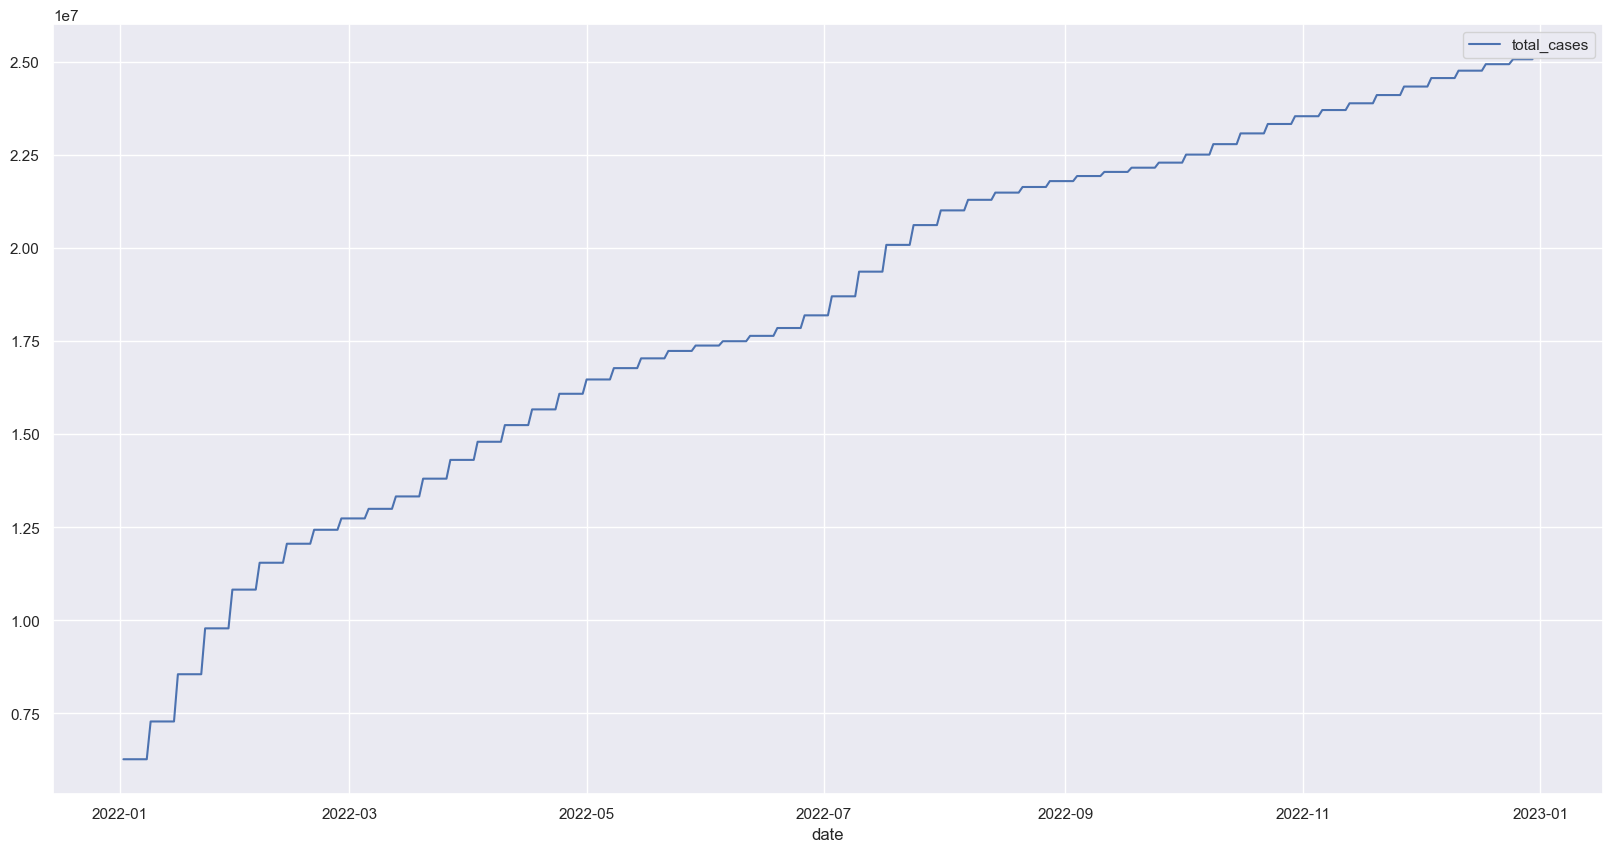

In [151]:
import seaborn as sns
#setto le dimensioni del grafico per una migliore visualizzazione
sns.set(rc={"figure.figsize": (20, 10)})
#stampo
sns.lineplot(data=dati_ita_tot)

In [152]:
#preparo un nuovo dataframe, filtrando i sati che ritengo utili
df["date"] = pd.to_datetime(df["date"])
dati_ita_new = df.loc[(df["location"]=="Italy")&(df["new_cases"] > 0)&(df["date"] > "2022-01-01")&(df["date"] < "2022-12-31")]
dati_ita_new = dati_ita_new.groupby("date")["new_cases"].sum()

c:\Users\luigi.solazzi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\luigi.solazzi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='new_cases'>

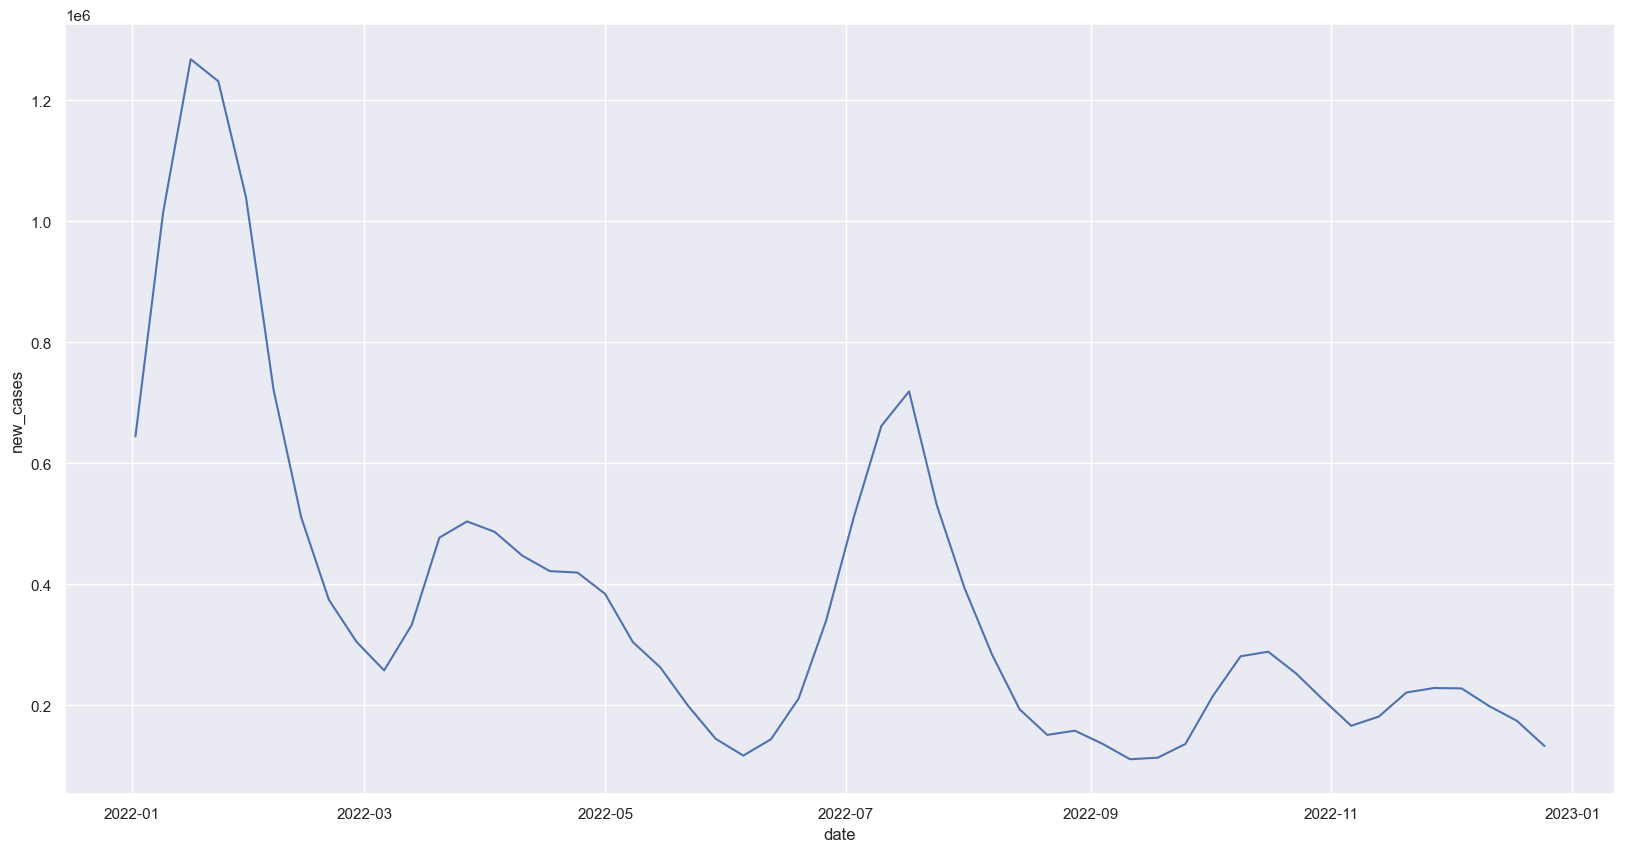

In [153]:
import seaborn as sns
#setto le dimensioni del grafico per una migliore visualizzazione
sns.set(rc={"figure.figsize": (20, 10)})
#stampo
sns.lineplot(data=dati_ita_new)

In [169]:
#preparo un nuovo dataframe applicando i filtri adeguati
df["date"] = pd.to_datetime(df["date"])
dati_ita_incr = df.loc[(df["location"]=="Italy")&(df["new_cases"] > 0)&(df["date"] > "2022-01-01")&(df["date"] < "2022-12-31")]
dati_ita_incr = dati_ita_incr.loc[:,["date","new_cases","total_cases"]].set_index("date")
dati_ita_incr["cumulativo"] = dati_ita_incr["new_cases"].cumsum()
dati_ita_incr


,new_cases,total_cases,cumulativo
date,,,
2022-01-02,644604.0,6267035.0,644604.0
2022-01-09,1014262.0,7281297.0,1658866.0
2022-01-16,1268153.0,8549450.0,2927019.0
2022-01-23,1231741.0,9781191.0,4158760.0
2022-01-30,1040184.0,10821375.0,5198944.0
2022-02-06,721418.0,11542793.0,5920362.0
2022-02-13,510537.0,12053330.0,6430899.0
2022-02-20,374443.0,12427773.0,6805342.0
2022-02-27,304907.0,12732680.0,7110249.0


c:\Users\luigi.solazzi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\luigi.solazzi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date'>

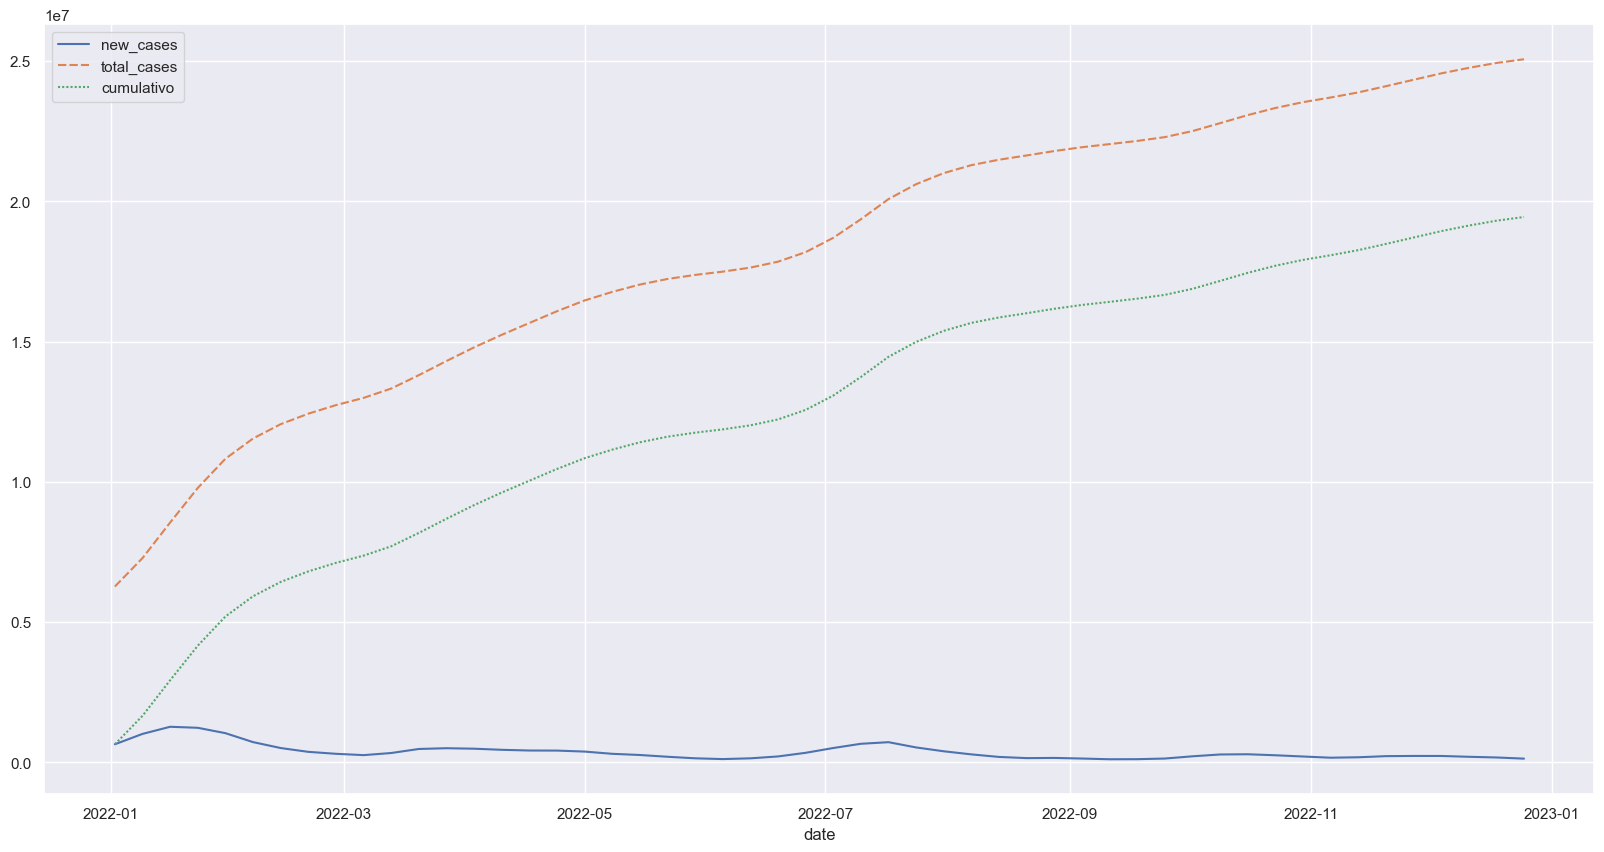

In [170]:
import seaborn as sns
#setto le dimensioni del grafico per una migliore visualizzazione
sns.set(rc={"figure.figsize": (20, 10)})
#stampo
sns.lineplot(data=dati_ita_incr)

In [ ]:
#come possiamo vedere i casi totali e il cumulativo dei nuovi casi seguono lo stesso andamento, differiscono solo dalle condizioni iniziali. 
# La spiegazione sta nel significato intrinseco dei casi totali, ovvero i casi totali giornalieri sono i casi totali del giorno precedente più
# i nuovi casi odierni. Quindi, se calcolo il valore cumulato dei nuovi casi, sto sostanzialmente calcolando i casi totali
# a partire da una certa data.


• Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

C:\Users\luigi.solazzi\AppData\Local\Temp\ipykernel_11456\283661271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_naz["icu_patients"] = dati_naz["icu_patients"].astype(float)


<Axes: >

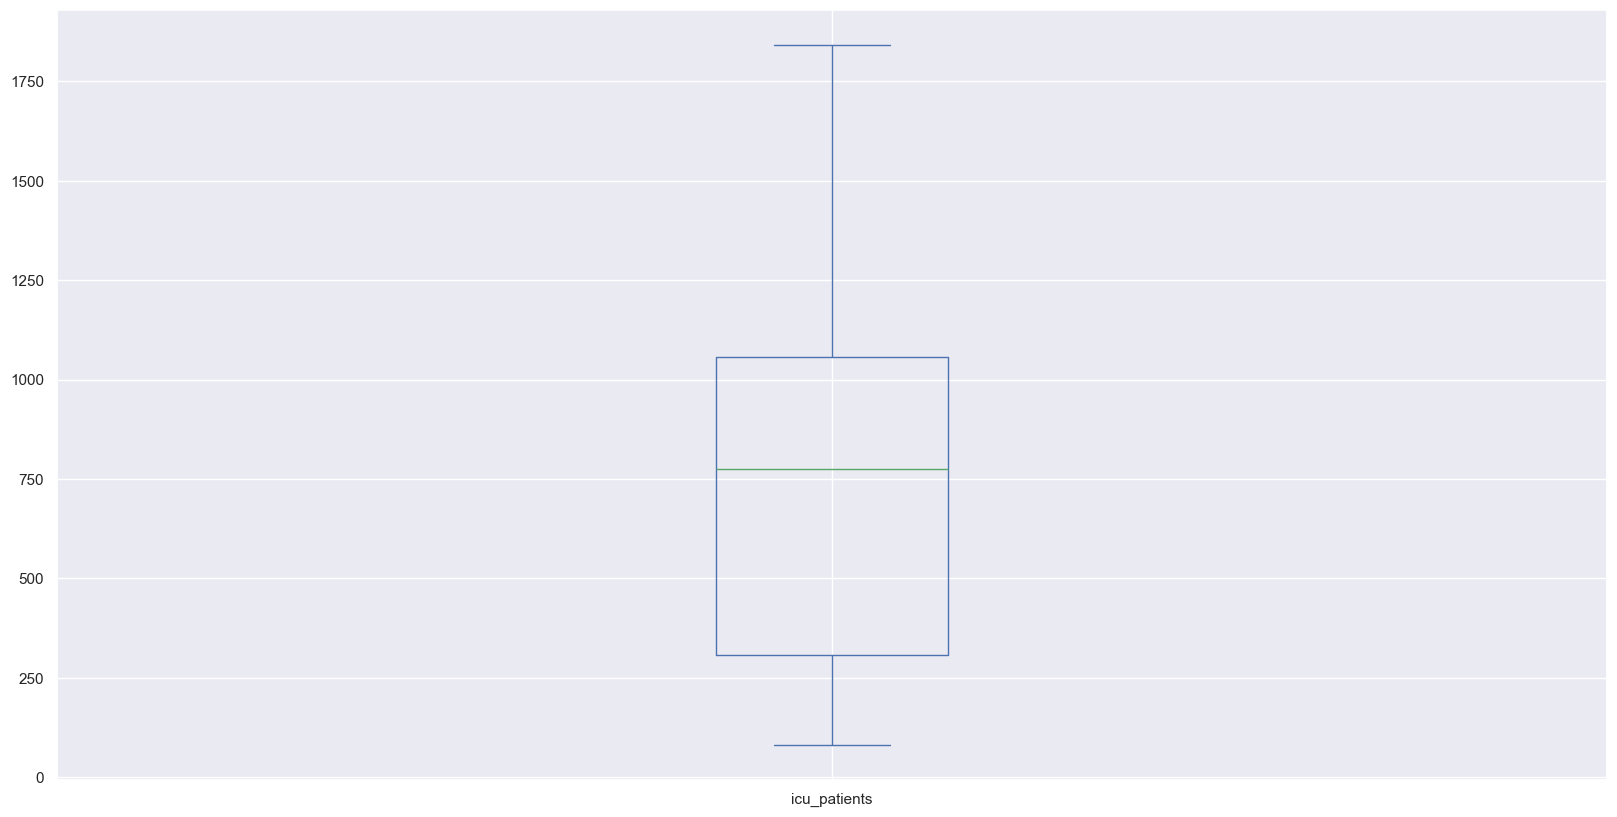

In [189]:
dati_naz = df.loc[((df["location"]=="Italy")|(df["location"]=="Germany")|(df["location"]=="France"))&(df["date"] > "2022-05-01")&(df["date"] < "2023-04-30")]
dati_naz["icu_patients"] = dati_naz["icu_patients"].astype(float)
dati_naz["icu_patients"].plot(kind="box")

• Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [191]:
dati_naz = df.loc[((df["location"]=="Italy")|(df["location"]=="Germany")|(df["location"]=="France")|(df["location"]=="Spain"))&(df["date"] > "2023-01-01")&(df["date"] < "2023-12-31")]
dati_naz.groupby("location")["hosp_patients"].sum()

location
France     1358417.0
Germany          0.0
Italy      1160274.0
Spain       351301.0
Name: hosp_patients, dtype: float64

In [ ]:
#Per quanto riguarda i nulli della germania c'è poco da fare, con ogni porbabilità è un dato che non è mai stato raccolto, 
# oppure è stato raccolto erroneamente in un altra colonna, pertanto bisognerebbe indagare sulla natura della raccolta del dato stesso. 
# Per le altre nazioni invece, la soluzione migliore sarebbe quella di operare con una sostituzione dei nulli, inserendo come valore 
# il valore del giorno precedente per ogni paese. 